In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

載入鳶尾花資料

In [6]:
url = 'https://github.com/1010code/iris-dnn-tensorflow/raw/master/data/Iris.csv'
s=requests.get(url).content
df_train=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_train=df_train.drop(labels=['Id'],axis=1)#移除Id欄位整欄
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


定義花種為數值

In [7]:
label_define={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df_train['Class']=df_train['Species'].map(label_define) #將Species欄位映射到數字上

In [8]:
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


EDA分析

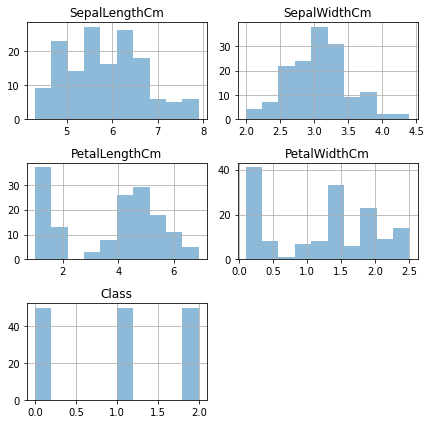

In [12]:
df_train.hist(alpha=0.5,figsize=(6,6))#alpha透明度 figsize表示圖表大小
plt.tight_layout()#子圖化顯示
plt.show()

KDE分析

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e6b794cd0>,
      dtype=object)

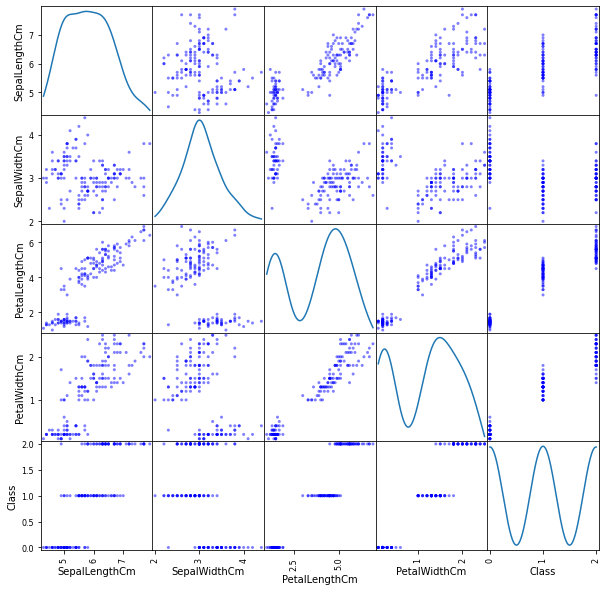

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_train,figsize=(10,10),color='b',diagonal='kde')

用sns畫畫看

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


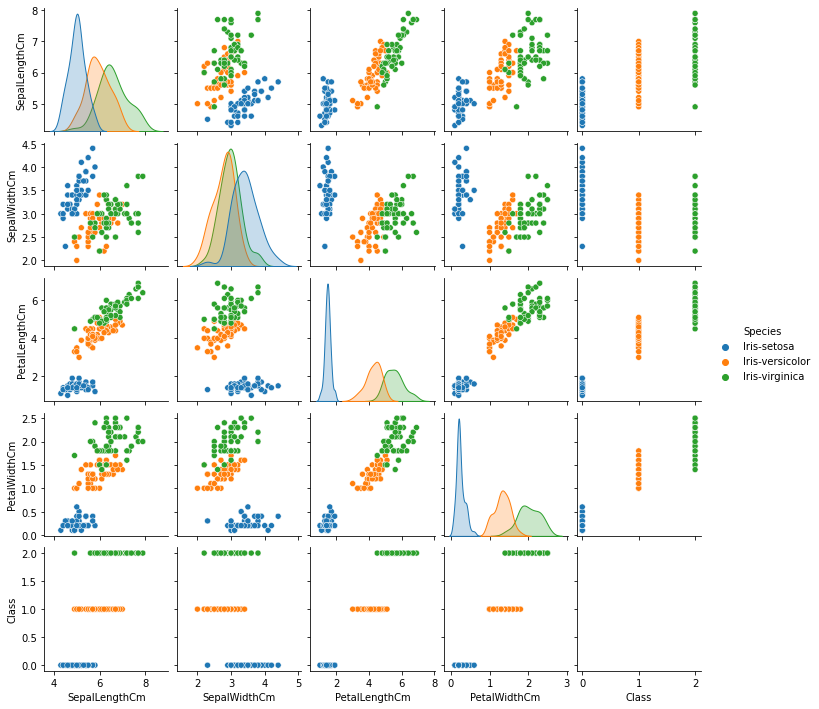

In [15]:
sns.pairplot(df_train,hue='Species',size=2,diag_kind="kde")#hue以誰為主體做表

關聯分析 (correlation map)

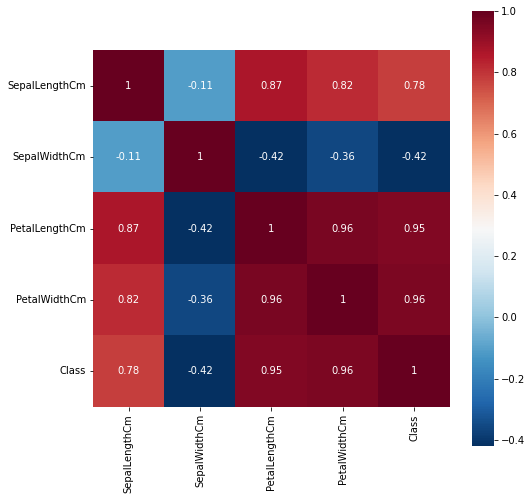

In [23]:
corr=df_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Class']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,square=True,annot=True,cmap="RdBu_r")#square使格子變方形annot寫入值 cmap決定顏色

散佈圖:長寬與品種關係

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


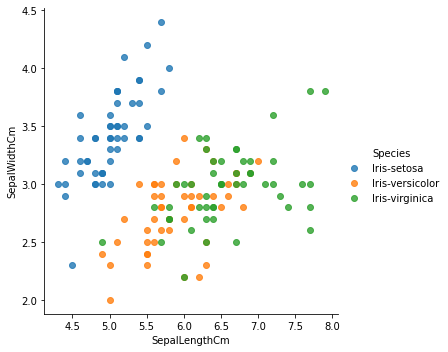

In [27]:
sns.lmplot("SepalLengthCm","SepalWidthCm",hue="Species",data=df_train,fit_reg=False)#fit_reg畫出回歸線

散佈圖:花朵長寬與品種關係

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


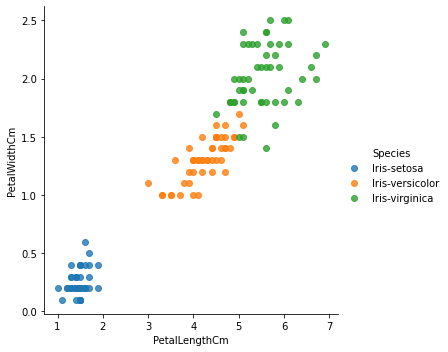

In [28]:
sns.lmplot("PetalLengthCm","PetalWidthCm",hue="Species",data=df_train,fit_reg=False)#fit_reg畫出回歸線

Text(0.5, 1.0, 'Class')

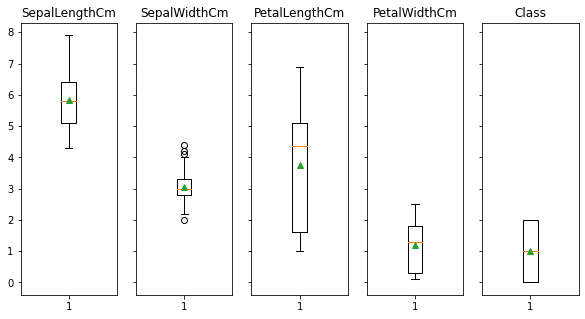

In [34]:
fig,axes=plt.subplots(nrows=1,ncols=5,figsize=(10,5),sharey=True) #sharey共享y軸
axes[0].boxplot(df_train['SepalLengthCm'],showmeans=True)
axes[0].set_title('SepalLengthCm')
axes[1].boxplot(df_train['SepalWidthCm'],showmeans=True)
axes[1].set_title('SepalWidthCm')

axes[2].boxplot(df_train['PetalLengthCm'],showmeans=True)
axes[2].set_title('PetalLengthCm')

axes[3].boxplot(df_train['PetalWidthCm'],showmeans=True)
axes[3].set_title('PetalWidthCm')

axes[4].boxplot(df_train['Class'],showmeans=True)
axes[4].set_title('Class')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

[Text(0.5, 0, 'PetalWidthCm'), Text(0.5, 1.0, 'distribution of PetalWidthCm')]

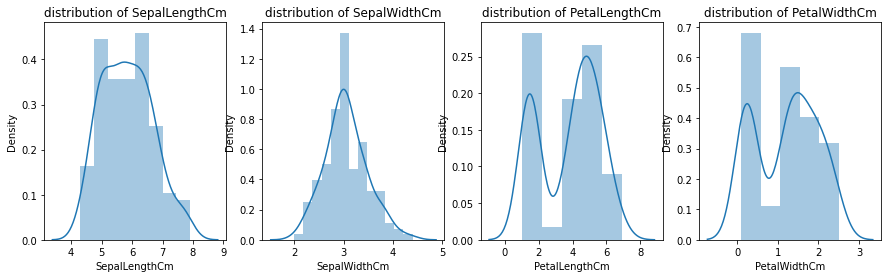

In [38]:
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15,4)
sns.distplot(df_train["SepalLengthCm"][:],ax=axes[0])#ax表示畫在哪個位置
sns.distplot(df_train["SepalWidthCm"][:],ax=axes[1])
sns.distplot(df_train["PetalLengthCm"][:],ax=axes[2])
sns.distplot(df_train["PetalWidthCm"][:],ax=axes[3])

axes[0].set(xlabel='SepalLengthCm',title="distribution of SepalLengthCm")
axes[1].set(xlabel='SepalWidthCm',title="distribution of SepalWidthCm")
axes[2].set(xlabel='PetalLengthCm',title="distribution of PetalLengthCm")
axes[3].set(xlabel='PetalWidthCm',title="distribution of PetalWidthCm")